In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 6].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [4]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,6,2012-01-01,63.0,34.0,48.5,0.0,31.0,43.0,16.0,0.0,447,1062,MD,0.0,0.0,29.95,30.47,14.0,36.0,13.8,2012,1,1,50.612264,43.029807,615,6,1,0,0,0,1
1,6,2012-01-02,60.0,30.0,45.0,-4.0,27.0,38.0,20.0,0.0,447,1062,MD,0.0,0.0,30.09,30.63,9.0,1.0,9.3,2012,1,2,49.046391,40.115210,615,0,0,0,0,0,1
2,6,2012-01-03,62.0,25.0,43.5,-5.0,26.0,37.0,21.0,0.0,447,1063,MD,0.0,0.0,29.88,30.48,5.4,18.0,5.8,2012,1,3,49.830686,40.050058,616,1,0,0,0,0,1
3,6,2012-01-04,71.0,31.0,51.0,2.0,41.0,45.0,14.0,0.0,448,1064,BR,0.0,0.0,29.72,30.28,0.8,22.0,4.7,2012,1,4,68.500427,49.570307,616,2,0,1,1,0,0
4,6,2012-01-05,71.0,38.0,54.5,6.0,43.0,50.0,10.0,0.0,448,1065,MD,0.0,0.0,29.68,30.24,0.3,25.0,2.3,2012,1,5,65.061082,55.385534,617,3,0,0,0,0,1


In [5]:
len(station)

1035

In [6]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 31 ( 3.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 0 ( 0.0 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [10]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [11]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [12]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
205567,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,107,0
205568,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,108,0
205569,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,109,0
205570,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,110,0
205571,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,111,0


In [13]:
station['log1p_units'] = np.log1p(station.units)

In [14]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [15]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
205567,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,107
205568,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,108
205569,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,109
205570,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,110
205571,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,111


In [16]:
len(station)

205572

In [17]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [18]:
df2.to_csv("station6.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [20]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + snowfall + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1961.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:58:21   Log-Likelihood:            -6.5883e+05
No. Observations:              205572   AIC:                         1.318e+06
Df Residuals:                  205396   BIC:                         1.320e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]     -5.6611      6

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [22]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1965.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:03:53   Log-Likelihood:            -6.5872e+05
No. Observations:              205572   AIC:                         1.318e+06
Df Residuals:                  205396   BIC:                         1.320e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [23]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

4571

In [24]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
200996,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,107,0
200997,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,108,0
200998,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,109,0
200999,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,110,0
201000,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,111,0


In [25]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.416e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:05:25   Log-Likelihood:            -2.3829e+05
No. Observations:              201001   AIC:                         4.769e+05
Df Residuals:                  200825   BIC:                         4.787e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 4. 변수변환 : df2 (log1p_units) 

In [26]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     2595.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:07:09   Log-Likelihood:                -53817.
No. Observations:              205572   AIC:                         1.080e+05
Df Residuals:                  205396   BIC:                         1.098e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [27]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

6672

In [28]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
198895,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,107,0.0
198896,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,108,0.0
198897,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,109,0.0
198898,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,110,0.0
198899,6,2014-10-31,76.0,51.0,63.5,0.0,47.0,55.0,1.0,0.0,404,1065,RA BR,0.0,0.17,29.72,30.22,11.3,36.0,11.7,2014,10,31,54.905919,62.452686,661,4,0,2,1,0,0,13,111,0.0


In [29]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 9.799e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:09:10   Log-Likelihood:             3.6678e+05
No. Observations:              198900   AIC:                        -7.332e+05
Df Residuals:                  198728   BIC:                        -7.315e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [120]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.951e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:44:08   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91624   BIC:                        -2.818e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

R^2값이 1에 가까워지고 조건수는 변화없어 과최적화가 의심

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/sunset/sunrise/daytime/stnpressure/sealevel제거(VIF에 근거)

In [31]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.003e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:10:25   Log-Likelihood:             3.6678e+05
No. Observations:              198900   AIC:                        -7.332e+05
Df Residuals:                  198732   BIC:                        -7.315e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [39]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.016e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:13:21   Log-Likelihood:             3.6678e+05
No. Observations:              198900   AIC:                        -7.332e+05
Df Residuals:                  198734   BIC:                        -7.315e+05
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+windchill/avgspeed제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [46]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.028e+05
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:15:55   Log-Likelihood:             3.6678e+05
No. Observations:              198900   AIC:                        -7.332e+05
Df Residuals:                  198736   BIC:                        -7.316e+05
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/windchill제거(VIF에 근거)  + 유의하지 않은 변수 제거 -> 정규화

In [62]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(year) + C(store_nbr) + C(item_nbr) + 0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4018.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:22:55   Log-Likelihood:                -53840.
No. Observations:              205572   AIC:                         1.079e+05
Df Residuals:                  205458   BIC:                         1.091e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(year)[2012]          0.0030      0

### F- 검정

In [61]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(year),3.0,1459.151608,486.383869,4917.630820,0.000000
C(store_nbr),1.0,0.511126,0.511126,5.167784,0.023011
C(item_nbr),110.0,44910.815621,408.280142,4127.955584,0.000000
C(weekend),1.0,1.520256,1.520256,15.370695,0.000088
Residual,205457.0,20320.958264,0.098906,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

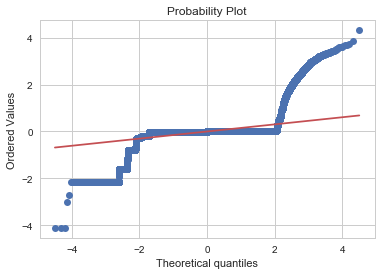

In [56]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',\
         'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tavg
1,inf,sunrise
2,inf,sunset
3,inf,daytime
4,2.641888e+06,sealevel
5,2.235229e+06,stnpressure
6,3.913243e+05,tmin
7,1.368189e+04,tmax
8,9.877878e+03,windchill
9,5.845899e+03,dewpoint


tmax, sunrise, tavg, daytime, tmin, sunset, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [32]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,3278.251979,dewpoint
1,3230.842707,wetbulb
2,2000.539969,windchill
3,727.310086,relative_humility
4,47.212743,avgspeed
5,40.045284,cool
6,31.461042,resultspeed
7,23.999109,heat
8,4.088469,item_nbr
9,1.148382,snowfall


### VIF : dewpoint 버리고 다시 

In [34]:
cols = ['wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,2940.938148,wetbulb
1,1804.140912,windchill
2,162.983500,relative_humility
3,47.202333,avgspeed
4,31.340600,resultspeed
5,7.805899,cool
6,4.086124,item_nbr
7,2.880807,heat
8,1.144085,snowfall
9,1.115846,preciptotal


### VIF : wetbulb 버리고 다시 

In [37]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,53.069761,windchill
1,44.107761,avgspeed
2,31.170531,resultspeed
3,29.924798,relative_humility
4,7.622187,cool
5,4.085823,item_nbr
6,2.420907,heat
7,1.143974,snowfall
8,1.111370,preciptotal


### VIF : windchill 버리고 다시 

In [40]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', \
        'relative_humility', 'avgspeed', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,40.222013,avgspeed
1,29.460695,resultspeed
2,8.013813,relative_humility
3,3.828985,item_nbr
4,2.621480,cool
5,2.085712,heat
6,1.126486,snowfall
7,1.084287,preciptotal


### VIF :  avgspeed 버리고 다시 

In [44]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'item_nbr', 'relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.811842,relative_humility
1,3.795379,item_nbr
2,3.793362,resultspeed
3,2.613657,cool
4,2.084143,heat
5,1.126452,snowfall
6,1.072372,preciptotal


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [57]:
from patsy import dmatrix

In [58]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [59]:
len(df2_1_X), len(df2_1_target)

(198900, 198900)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [64]:
formula = 'C(year) + C(store_nbr) + C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.98791832, 0.98703871, 0.98902173, 0.98844535, 0.98797314,
       0.98698933, 0.98985173, 0.98675949, 0.9893176 , 0.98868076])

In [66]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.12775435, 0.12856033, 0.12495533, 0.12575025, 0.12648588,
       0.12914726, 0.1258396 , 0.12882074, 0.12757891, 0.12776934])

In [67]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([-0.00750091, -0.00753579, -0.00825744, -0.00779816, -0.0079668 ,
       -0.00727401, -0.00787587, -0.00748332, -0.00731062, -0.00716152])

In [68]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.00750091, -0.00753579, -0.00825744, -0.00779816, -0.0079668 ,
       -0.00727401, -0.00787587, -0.00748332, -0.00731062, -0.00716152])

### station 평균성능

In [69]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.9881996153776751,
 0.1272661993797574,
 -0.0076164443172822335,
 -0.0076164443172822335)